<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Group12/Kaggle_Challenge/blob/main/Assignment_2_Group_project_Kaggle_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Connect drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load data
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [ ]:
# Display first few rows
train_df.head()
test_passenger_ids = test_df['PassengerId']

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


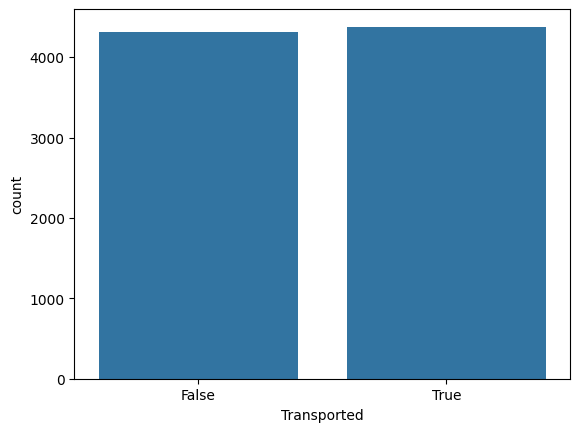

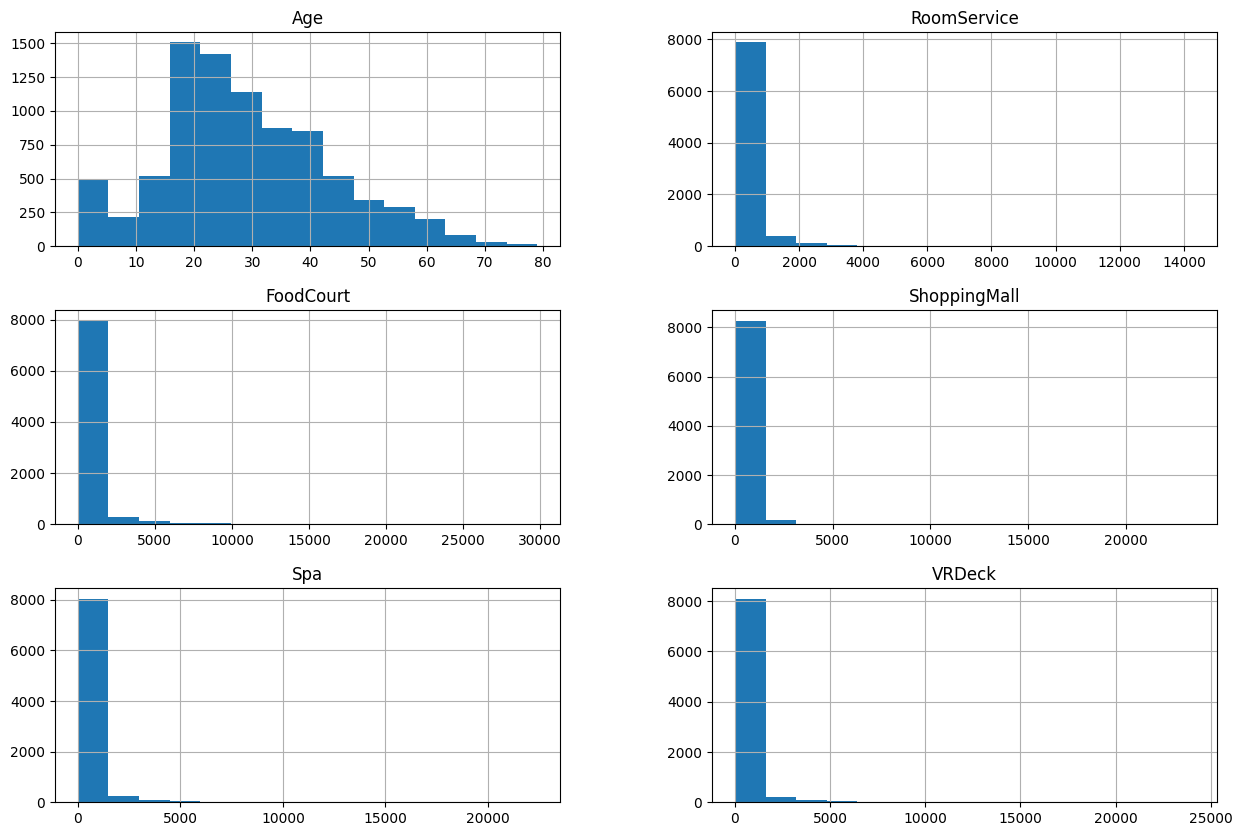

In [ ]:
# Checking for missing values
print(train_df.isnull().sum())


# Distribution of target variable
sns.countplot(data=train_df, x='Transported')
plt.show()

# Visualizing numeric features
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[numeric_features].hist(bins=15, figsize=(15, 10))
plt.show()

In [ ]:
# Drop the PassengerId, Name, and Cabin columns
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

# Identify features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Data preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Splitting the data
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(verbose=2),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbose=2),
    'LogisticRegression': LogisticRegression(max_iter=1000, verbose=2)
}

# Evaluate models
best_model = None
best_accuracy = 0
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Validation Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model}")

# Hyperparameter tuning for the best model
if isinstance(best_model, XGBClassifier):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }
elif isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
elif isinstance(best_model, LogisticRegression):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    }

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))


Training RandomForest...
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:16:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


RandomForest Validation Accuracy: 0.7786083956296722
Training XGBoost...
XGBoost Validation Accuracy: 0.7883841288096607
Training LogisticRegression...
LogisticRegression Validation Accuracy: 0.7722829212190915
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Fitting 5 fold

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:17:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:17:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Validation Accuracy: 0.7855089131684876
              precision    recall  f1-score   support

       False       0.82      0.73      0.77       861
        True       0.76      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.79      0.78      1739



In [ ]:
# Predict on test data
test_predictions = best_model.predict(test_df)

# Convert 1 and 0 to TRUE and FALSE
test_predictions = ['True' if x == 1 else 'False' for x in test_predictions]

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Transported': test_predictions
})
submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)

# Display submission
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


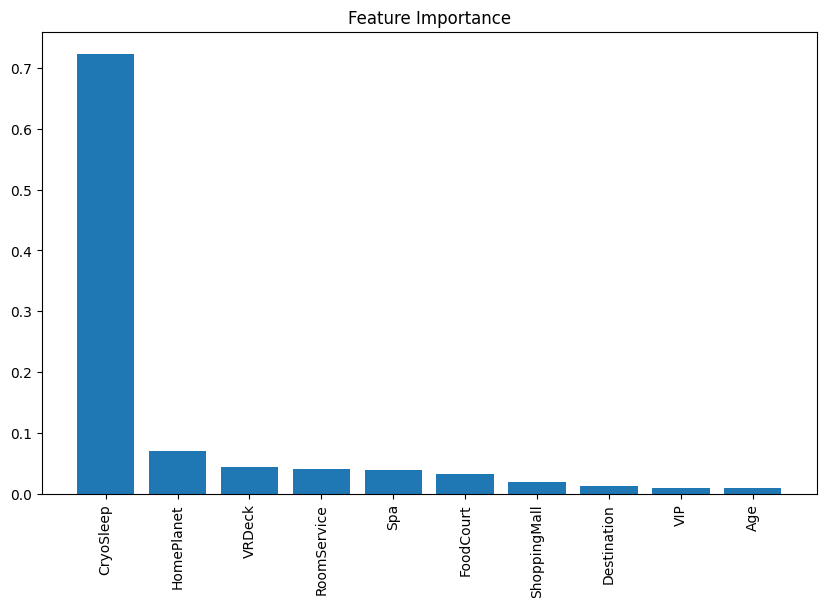

Misclassified instances analysis
       HomePlanet   CryoSleep  Destination         Age         VIP  \
count  373.000000  373.000000   373.000000  373.000000  373.000000   
mean     0.450402    0.308311     1.595174   -0.022206    0.021448   
std      0.769605    0.462416     0.710655    0.979639    0.145066   
min      0.000000    0.000000     0.000000   -2.007610    0.000000   
25%      0.000000    0.000000     1.000000   -0.682698    0.000000   
50%      0.000000    0.000000     2.000000   -0.194573    0.000000   
75%      1.000000    1.000000     2.000000    0.642213    0.000000   
max      2.000000    1.000000     2.000000    3.082840    1.000000   

       RoomService   FoodCourt  ShoppingMall         Spa      VRDeck  
count   373.000000  373.000000    373.000000  373.000000  373.000000  
mean     -0.122766   -0.063265      0.051055   -0.184890   -0.127021  
std       0.625992    0.662666      0.696528    0.300898    0.418148  
min      -0.333105   -0.281027     -0.283579   -0.27

In [ ]:
# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

# Analyzing misclassified instances
misclassified = X_val[y_val != y_pred]
print("Misclassified instances analysis")
print(misclassified.describe())